In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
automobile = fetch_ucirepo(id=10)
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X1 = automobile.data.features
y1 = automobile.feature_names
df = pd.DataFrame(automobile.data.features, columns=automobile.feature_names)

print(df.columns)


Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses'],
      dtype='object')


In [6]:
df['average-mpg'] = (df['city-mpg'] + df['highway-mpg']) / 2

In [7]:
# Group by 'make' and calculate average fuel efficiency
fuel_eff_stats = df.groupby('make')['average-mpg'].mean().sort_values(ascending=False)

# Display top results
print(fuel_eff_stats.head())

make
chevrolet     43.666667
isuzu         33.500000
honda         32.923077
volkswagen    31.750000
plymouth      31.142857
Name: average-mpg, dtype: float64


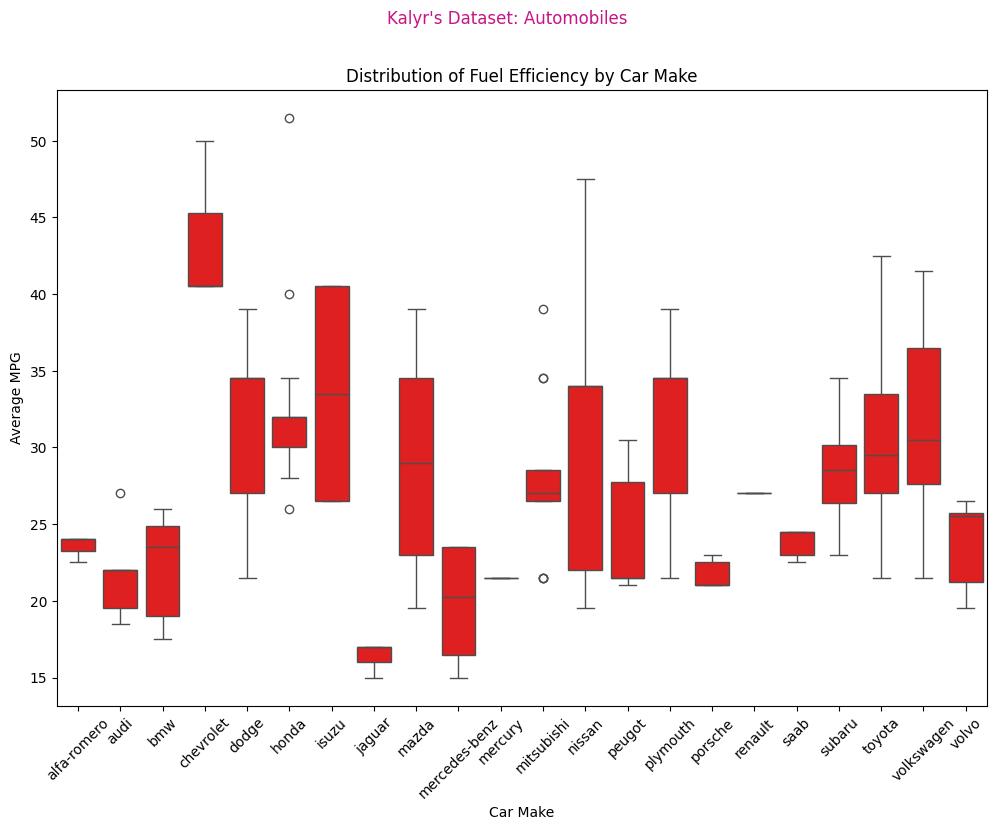

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' has 'make' and 'average-mpg' columns correctly set up
plt.figure(figsize=(12, 8))
sns.boxplot(x='make', y='average-mpg', data=df, color ='red')
plt.xticks(rotation=45)
plt.suptitle("Kalyr's Dataset: Automobiles", color='blue')
plt.title('Distribution of Fuel Efficiency by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average MPG')
plt.show()

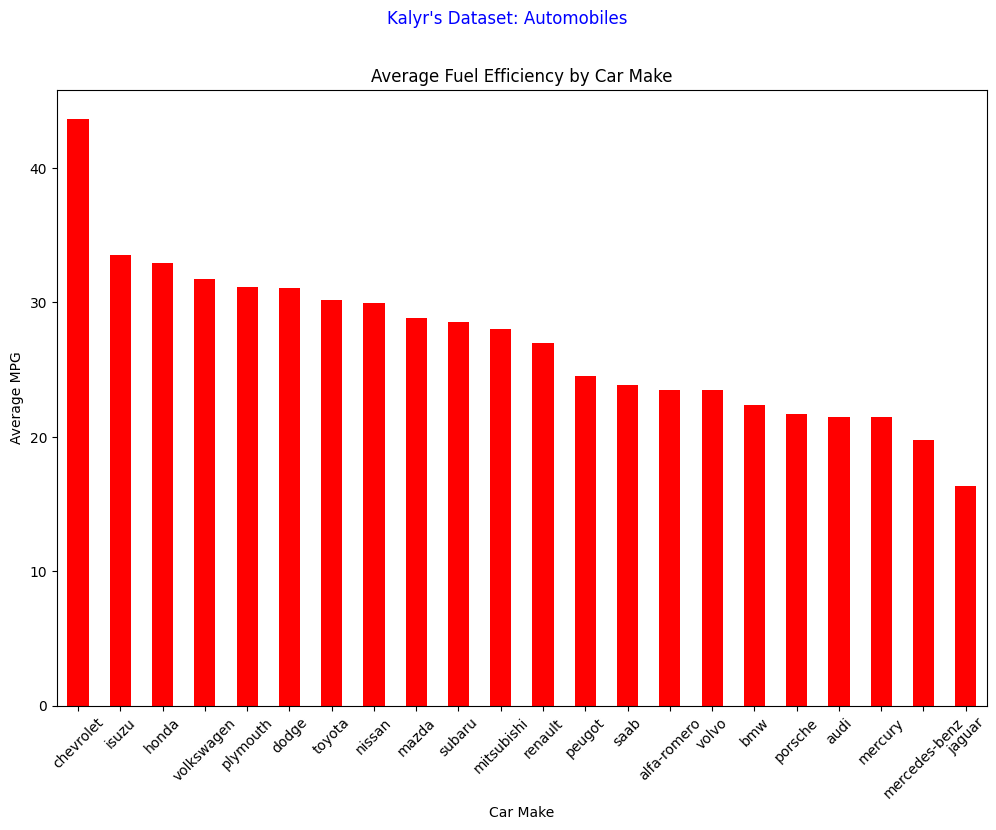

In [10]:

import matplotlib.pyplot as plt

# Plotting average MPG by car make
plt.figure(figsize=(12, 8))
fuel_eff_stats.plot(kind='bar', color='red')
plt.suptitle("Kalyr's Dataset: Automobiles", color='blue')
plt.title('Average Fuel Efficiency by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average MPG')
plt.xticks(rotation=45)
plt.show()

In [42]:
# df = pd.read_csv('your_dataset.csv')  # Assuming the DataFrame is named df

# Calculate engine score (example: normalized values of horsepower, engine size, and inverse of fuel consumption)
df['engine_score'] = (df['horsepower'] / df['horsepower'].max() + 
                      df['engine-size'] / df['engine-size'].max() + 
                      (1 / df['average-mpg']) / (1 / df['average-mpg']).max())

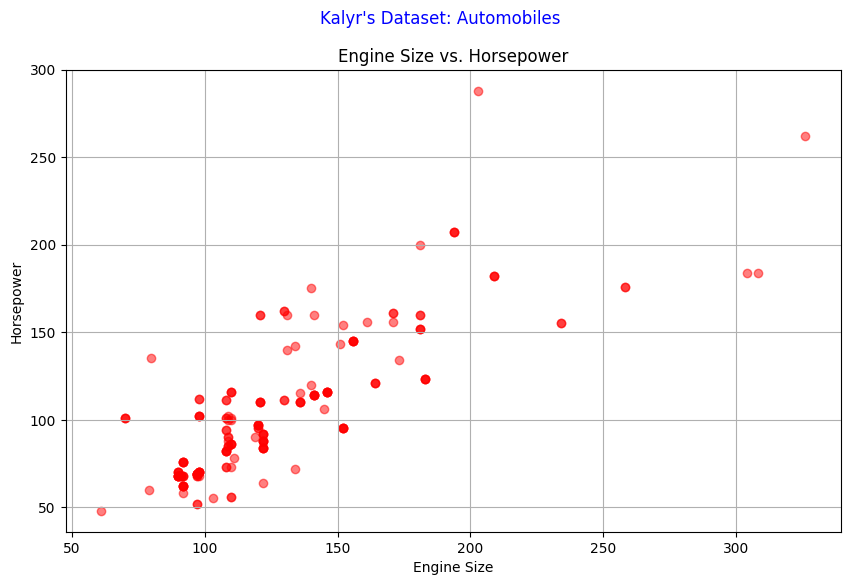

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['engine-size'], df['horsepower'], alpha=0.5, color= 'red')
plt.suptitle("Kalyr's Dataset: Automobiles", color='blue')
plt.title('Engine Size vs. Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.grid(True)
plt.show()

In [43]:
# Group by make and calculate average engine score
engine_performance = df.groupby('make')['engine_score'].mean().sort_values(ascending=False)

# Print top performing makes
print(engine_performance.head())

make
jaguar           2.493157
porsche          1.997128
mercedes-benz    1.992335
mercury          1.734761
bmw              1.679228
Name: engine_score, dtype: float64
